# Pantheon dataset: Exploratory data analysis

In [36]:
import pandas as pd

df = pd.read_csv("https://storage.googleapis.com/pantheon-public-data/person_2020_update.csv.bz2")
df = df[df.is_group == False]
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,l,hpi_raw,bplace_name,bplace_lat,bplace_lon,bplace_geonameid,bplace_country,birthdate,birthyear,dplace_name,dplace_lat,dplace_lon,dplace_geonameid,dplace_country,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
0,18934,Q9458,18934,Muhammad,Muhammad,RELIGIOUS FIGURE,0.0,M,NaN,False,193,36,Mecca,21.416667,39.816667,21021.0,Saudi Arabia,NaN,570.0,Medina,24.466667,39.600000,36636.0,Saudi Arabia,0632-06-08,632.0,Mecca,NaN,False,27.918400,1450.0,5160422.0,3.199355,100.000000
1,17414699,Q720,17414699,Genghis_Khan,Genghis Khan,MILITARY PERSONNEL,0.0,M,NaN,False,154,35,Khentii Mountains,48.783300,109.167000,7300427.0,Mongolia,NaN,1162.0,Yinchuan,38.472000,106.258900,465955.0,China,1227-08-18,1227.0,NaN,NaN,False,25.843621,858.0,3249211.0,2.753641,97.723669
2,18079,Q762,18079,Leonardo_da_Vinci,Leonardo da Vinci,INVENTOR,0.0,M,NaN,False,221,35,Republic of Florence,43.783333,11.250000,11525.0,Italy,1452-04-15,1452.0,Clos Lucé,47.410230,0.991525,98219.0,France,1519-05-02,1519.0,NaN,NaN,False,17.545406,568.0,5362406.0,4.796629,97.460691
3,14627,Q935,14627,Isaac_Newton,Isaac Newton,PHYSICIST,0.0,M,NaN,False,215,35,Woolsthorpe Manor,52.809167,-0.630556,140503.0,United Kingdom,1643-01-04,1643.0,Kensington,51.500000,-0.190000,54732.0,United Kingdom,1727-03-31,1726.0,NaN,NaN,False,21.608920,378.0,3431331.0,4.632474,96.836567
4,17914,Q255,17914,Ludwig_van_Beethoven,Ludwig van Beethoven,COMPOSER,0.0,M,NaN,False,194,35,Bonn,50.733333,7.100000,3295.0,Germany,1770-12-16,1770.0,Vienna,48.200000,16.366667,55866.0,Austria,1827-03-26,1827.0,NaN,Austria,False,19.796430,250.0,5179518.0,3.926626,96.583969


In [37]:
df.describe()

,id,wp_id,prob_ratio,l,hpi_raw,bplace_lat,bplace_lon,bplace_geonameid,birthyear,dplace_lat,dplace_lon,dplace_geonameid,deathyear,l_,age,non_en_page_views,coefficient_of_variation,hpi
count,8.557400e+04,8.557400e+04,85515.000000,85574.000000,85574.000000,82108.000000,82108.000000,8.099000e+04,85145.000000,36982.000000,36982.000000,3.687700e+04,40374.000000,85538.000000,85572.000000,8.553800e+04,85538.000000,85574.000000
mean,9.790574e+06,9.790574e+06,84.881356,26.341728,19.042197,38.175137,2.299985,3.276963e+06,1782.224464,41.028420,-4.792683,2.978397e+06,1647.799326,4.866900,231.619712,8.192338e+04,2.840383,58.073764
std,1.416230e+07,1.416230e+07,354.325421,15.735128,4.422794,19.946061,66.152733,8.012830e+06,515.561688,16.685115,56.444644,8.080663e+06,677.183744,2.714301,503.353689,2.763394e+05,0.973898,10.937190
min,3.070000e+02,3.070000e+02,0.000000,15.000000,-4.000000,-63.397500,-178.983333,7.700000e+01,-4000.000000,-81.500000,-178.150000,2.700000e+01,-4000.000000,1.000000,0.000000,5.700000e+01,0.108550,1.000000
25%,6.200410e+05,6.200410e+05,1.618077,17.000000,16.000000,35.183333,-52.000000,4.738400e+04,1876.000000,37.548958,-6.405250,2.384400e+04,1671.000000,2.820683,44.000000,4.854250e+03,2.100041,49.962002
50%,2.542027e+06,2.542027e+06,9.273243,21.000000,20.000000,42.331389,7.216667,1.779585e+05,1944.000000,44.416667,6.900000,7.001100e+04,1936.000000,4.407715,76.000000,1.589850e+04,2.723905,59.229657
75%,1.327213e+07,1.327213e+07,65.729736,29.000000,22.000000,50.266667,25.324408,1.363752e+06,1976.000000,50.750000,18.068611,6.450420e+05,1991.000000,6.328360,142.000000,5.623750e+04,3.406128,65.669162
max,6.502339e+07,6.502339e+07,41374.060965,249.000000,36.000000,80.000000,179.416667,9.991859e+07,2020.000000,90.000000,179.200000,6.438583e+07,2020.000000,81.570816,6020.000000,1.362147e+07,11.684395,100.000000


# Spatial data analysis - birth and death places

In [38]:
print(f"Missing samples of birth places: {df.bplace_lat.isna().sum()/df.id.count()*100}%")

Missing samples of birth places: 4.050295650548064%


In [39]:
print(f"Missing samples of death places: {df.dplace_lat.isna().sum()/df.id.count()*100}%")

Missing samples of death places: 56.78360249608526%


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


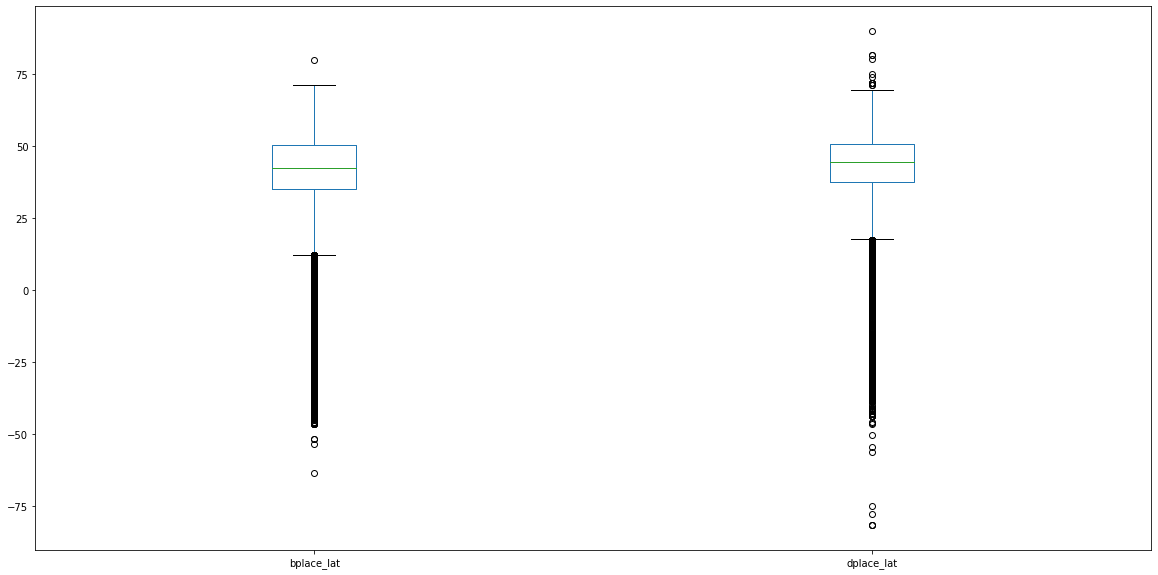

In [6]:
df[["bplace_lat", "dplace_lat"]].plot.box(figsize=(20,10))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


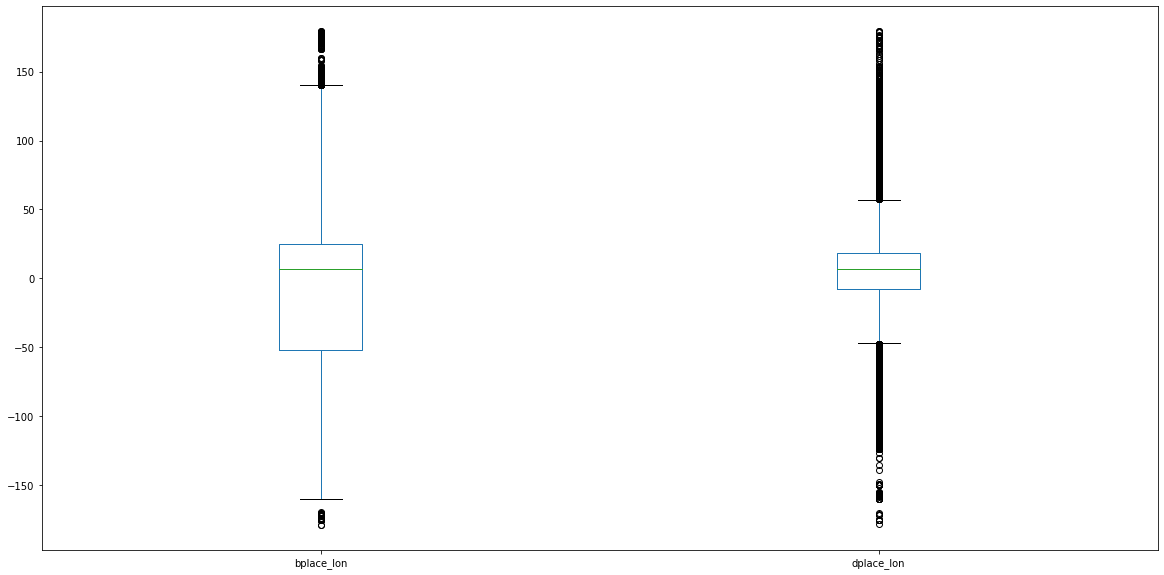

In [7]:
df[["bplace_lon", "dplace_lon"]].plot.box(figsize=(20,10))

# Temporal data analysis - birth and death dates

In [30]:
print(f"Missing samples of birth years: {df.birthyear.isna().sum()/df.id.count()*100}%")
print(f"Missing samples of death years: {df.deathyear.isna().sum()/df.id.count()*100}%")

Missing samples of birth years: 0.48348831195115644%
Missing samples of death years: 54.147317764260094%


In [41]:
print(f"Missing samples of birth dates: {df.birthdate.isna().sum()/df.id.count()*100}%")
print(f"Missing samples of death dates: {df.deathdate.isna().sum()/df.id.count()*100}%")

Missing samples of birth dates: 4.229088274475893%
Missing samples of death dates: 55.54607707948676%


In [74]:
print(f"BC rounded to the closest century: {100-(df[df.birthyear<0].birthyear%100>0).sum()/df[df.birthyear<0].birthyear.count()*100}%")
print(f"AD rounded to the closest century: {100-(df[df.birthyear>0].birthyear%100>0).sum()/df[df.birthyear>0].birthyear.count()*100}%")

BC rounded to the closest century: 44.30322287789378%
AD rounded to the closest century: 1.6204289796361309%


# Categorical data analysis - occupation

In [51]:
print(f"Missing samples of birth years: {df.occupation.isna().sum()/df.id.count()*100}%")


Missing samples of birth years: 0.0%


In [50]:
df.groupby("occupation").count().sort_values("id")

,id,wd_id,wp_id,slug,name,prob_ratio,gender,twitter,alive,l,hpi_raw,bplace_name,bplace_lat,bplace_lon,bplace_geonameid,bplace_country,birthdate,birthyear,dplace_name,dplace_lat,dplace_lon,dplace_geonameid,dplace_country,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
occupation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BULLFIGHTER,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1
GO PLAYER,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,2,2,2,2
GAMER,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,0,0,0,0,0,0,0,1,0,4,4,4,4,4,4
CRITIC,5,5,5,5,5,5,5,1,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,2,5,5,5,5,5,5
INSPIRATION,7,7,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,5,6,4,2,7,6,7,6,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SINGER,3329,3329,3329,3329,3329,3327,3329,1625,3329,3329,3329,3284,3284,3284,3269,3275,3323,3329,688,688,688,687,687,695,696,1791,161,3329,3325,3329,3325,3325,3329
WRITER,5762,5762,5762,5762,5762,5761,5757,453,5762,5762,5762,5605,5604,5604,5535,5598,5488,5749,4072,4072,4072,4064,4058,4134,4358,2906,1701,5762,5762,5762,5762,5762,5762
ACTOR,9986,9986,9986,9986,9986,9986,9984,3626,9986,9986,9986,9940,9940,9940,9931,9935,9981,9985,2605,2605,2605,2604,2605,2618,2620,6233,698,9986,9985,9986,9985,9985,9986


# The image acquisition code

In [ ]:
# Copy-paste from my old project to gather the images
import requests
import csv
import urllib.parse
from IPython.core.display import HTML

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

def find_commons_image(ids):
  query = "SELECT ?item ?pic WHERE { VALUES ?item {" + ' '.join(ids) + "}. ?item wdt:P18 ?pic}"
  result = requests.get("https://query.wikidata.org/sparql", params={'query': query}, headers={'Accept': 'text/csv'}).text
  data = list(csv.reader(result.split("\r\n"), delimiter=',', quotechar='"'))[:-1]
  df = pd.DataFrame(data[1:], columns=data[0])
  return df

images = find_commons_image(("wd:"+df.wd_id).values[:10])
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

HTML(images.to_html(escape=False, formatters=dict(pic=path_to_image_html)))

,item,pic
0,http://www.wikidata.org/entity/Q254,
1,http://www.wikidata.org/entity/Q255,
2,http://www.wikidata.org/entity/Q517,
3,http://www.wikidata.org/entity/Q720,
4,http://www.wikidata.org/entity/Q762,
5,http://www.wikidata.org/entity/Q868,
6,http://www.wikidata.org/entity/Q935,
7,http://www.wikidata.org/entity/Q1048,
8,http://www.wikidata.org/entity/Q8409,
9,http://www.wikidata.org/entity/Q9458,
